<a href="https://colab.research.google.com/github/Darshan2104/PlayWithPytorch/blob/main/Backpropagation_Training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
x= torch.tensor(1.0)
y= torch.tensor(2.0)

w = torch.tensor(0.5, requires_grad=True)

# Forwardpass and compute loss
y_hat = w*x
loss = (y_hat-y)**2

print(f"Loss : {loss}")

# Backwardpass
loss.backward()
print(w.grad)

# Updates out weights 
# Updates our forwardpass and backwardpass

Loss : 2.25
tensor(-3.)


## **autograd package for automatically computing gradient** 🙂

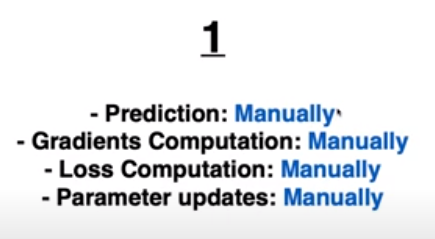

In [ ]:
import numpy as np

# f = w*x bias is ignored 
# f = 2*x actual function we want to get by learning parameters

X = np.array([1,2,3,4], dtype=np.float32)       #our input data
Y = np.array([2,4,6,8], dtype=np.float32)       # our expected output

w = 0.0                                         #we want machine to learn this weight

# model prediction
def forward(X):
  return w*X

# loss = MeanSquareError (MSE)
def loss(y,y_predicted):
  return ((y_predicted - y)**2).mean()

# Gradient
# MSE = 1/N *(w*x - y)**2
# dj/dw = 1/N *2*x*(w*x - y)
def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted - y).mean()

print(f'Prediction before training : f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
numbers_of_iteration = 20

for epoch in range(numbers_of_iteration):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l= loss(Y,y_pred)

  # Gradients
  dw = gradient(X,Y,y_pred)

  # Update our weights
  w = w - learning_rate*dw

  if epoch % 1 == 0 :
    print(f'epoch {epoch+1} : w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction before training : f(5) = {forward(5):.3f}')

Prediction before training : f(5) = 0.000
epoch 1 : w = 1.200, loss = 30.00000000
epoch 2 : w = 1.680, loss = 4.79999924
epoch 3 : w = 1.872, loss = 0.76800019
epoch 4 : w = 1.949, loss = 0.12288000
epoch 5 : w = 1.980, loss = 0.01966083
epoch 6 : w = 1.992, loss = 0.00314574
epoch 7 : w = 1.997, loss = 0.00050331
epoch 8 : w = 1.999, loss = 0.00008053
epoch 9 : w = 1.999, loss = 0.00001288
epoch 10 : w = 2.000, loss = 0.00000206
epoch 11 : w = 2.000, loss = 0.00000033
epoch 12 : w = 2.000, loss = 0.00000005
epoch 13 : w = 2.000, loss = 0.00000001
epoch 14 : w = 2.000, loss = 0.00000000
epoch 15 : w = 2.000, loss = 0.00000000
epoch 16 : w = 2.000, loss = 0.00000000
epoch 17 : w = 2.000, loss = 0.00000000
epoch 18 : w = 2.000, loss = 0.00000000
epoch 19 : w = 2.000, loss = 0.00000000
epoch 20 : w = 2.000, loss = 0.00000000
Prediction before training : f(5) = 10.000


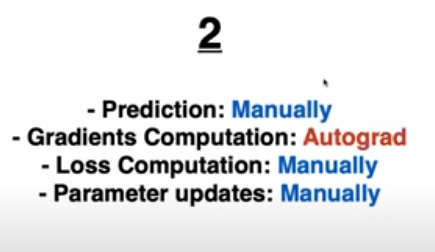

In [ ]:
import torch

# f = w*x bias is ignored 
# f = 2*x actual function we want to get by learning parameters

X = torch.tensor([1,2,3,4], dtype=torch.float32)                  # our input data
Y = torch.tensor([2,4,6,8], dtype=torch.float32)                  # our expected output

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)    # we want machine to learn this weight

# model prediction
def forward(X):
  return w*X

# loss = MeanSquareError (MSE)
def loss(y,y_predicted):
  return ((y_predicted - y)**2).mean()

print(f'Prediction before training : f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.03
numbers_of_iteration = 20

for epoch in range(numbers_of_iteration):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l= loss(Y,y_pred)

  # Gradients = backward pass
  l.backward()    # dl/dw 

  # Update our weights
  with torch.no_grad():
    w -=learning_rate * w.grad

  # Zero Gradients
  w.grad.zero_()

  if epoch % 1 == 0 :
    print(f'epoch {epoch+1} : w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction before training : f(5) = {forward(5):.3f}')

Prediction before training : f(5) = 0.000
epoch 1 : w = 0.900, loss = 30.00000000
epoch 2 : w = 1.395, loss = 9.07500076
epoch 3 : w = 1.667, loss = 2.74518776
epoch 4 : w = 1.817, loss = 0.83041906
epoch 5 : w = 1.899, loss = 0.25120178
epoch 6 : w = 1.945, loss = 0.07598852
epoch 7 : w = 1.970, loss = 0.02298653
epoch 8 : w = 1.983, loss = 0.00695340
epoch 9 : w = 1.991, loss = 0.00210341
epoch 10 : w = 1.995, loss = 0.00063628
epoch 11 : w = 1.997, loss = 0.00019248
epoch 12 : w = 1.998, loss = 0.00005823
epoch 13 : w = 1.999, loss = 0.00001761
epoch 14 : w = 2.000, loss = 0.00000533
epoch 15 : w = 2.000, loss = 0.00000161
epoch 16 : w = 2.000, loss = 0.00000049
epoch 17 : w = 2.000, loss = 0.00000015
epoch 18 : w = 2.000, loss = 0.00000004
epoch 19 : w = 2.000, loss = 0.00000001
epoch 20 : w = 2.000, loss = 0.00000000
Prediction before training : f(5) = 10.000


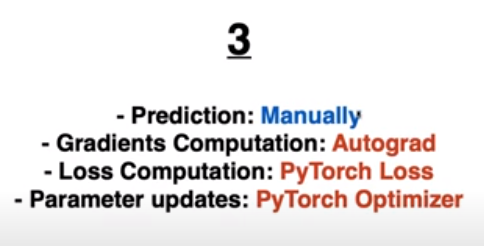

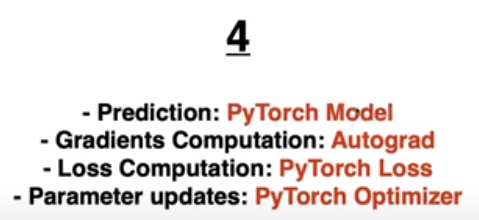

In [9]:
# Pipeline :

# 1.) Design model (input, output size, forward pass)
# 2.) Construct loss and optimizer
# 3.) Training loop
#     - Forward pass  : compute prediction
#     - Backward pass : Gradients
#     - Update weights

import torch
import torch.nn as nn

# f = w*x bias is ignored 
# f = 2*x actual function we want to get by learning parameters

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)                  # 4X1 (4 example and 1 feature)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)                  # our expected output

X_test = torch.tensor([5], dtype=torch.float32)

n_sample, n_feature = X.shape
input_size = n_feature
output_size = n_feature

model = nn.Linear(input_size,output_size)


print(f'Prediction before training : f(5) = {model(X_test).item():.3f}')

# Training 
learning_rate = 0.07
numbers_of_iteration = 300

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #Stocastic GD


for epoch in range(numbers_of_iteration):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l= loss(Y,y_pred)

  # Gradients
  l.backward()

  # Update our weights
  optimizer.step()

  # Zero Gradients
  optimizer.zero_grad()

  if epoch % 10 == 0 :
    [w,b] = model.parameters()
    print(f'epoch {epoch+1} : w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction before training : f(5) = {model(X_test).item():.3f}')

Prediction before training : f(5) = -1.896
epoch 1 : w = 2.224, loss = 43.95642853
epoch 11 : w = 1.884, loss = 0.02010555
epoch 21 : w = 1.907, loss = 0.01316280
epoch 31 : w = 1.924, loss = 0.00861748
epoch 41 : w = 1.939, loss = 0.00564173
epoch 51 : w = 1.950, loss = 0.00369356
epoch 61 : w = 1.960, loss = 0.00241811
epoch 71 : w = 1.968, loss = 0.00158310
epoch 81 : w = 1.974, loss = 0.00103644
epoch 91 : w = 1.979, loss = 0.00067854
epoch 101 : w = 1.983, loss = 0.00044423
epoch 111 : w = 1.986, loss = 0.00029083
epoch 121 : w = 1.989, loss = 0.00019040
epoch 131 : w = 1.991, loss = 0.00012465
epoch 141 : w = 1.993, loss = 0.00008161
epoch 151 : w = 1.994, loss = 0.00005343
epoch 161 : w = 1.995, loss = 0.00003498
epoch 171 : w = 1.996, loss = 0.00002290
epoch 181 : w = 1.997, loss = 0.00001499
epoch 191 : w = 1.997, loss = 0.00000982
epoch 201 : w = 1.998, loss = 0.00000643
epoch 211 : w = 1.998, loss = 0.00000421
epoch 221 : w = 1.999, loss = 0.00000275
epoch 231 : w = 1.999, l